In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('1.03. Dummies.csv')

In [3]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
data_done = data.copy()

In [5]:
data_done['Attendance'] = data_done['Attendance'].map({'Yes': 1, 'No':0})

In [6]:
data_done

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
data_done.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
x_need_to_be_processed = data_done [['SAT','Attendance']] # labels

y = data_done ['GPA'] # feature

In [9]:
x = sm.add_constant(x_need_to_be_processed) # final value of x while adding constant

In [10]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [11]:
results = sm.OLS(y,x).fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           2.19e-15
Time:                        09:18:06   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


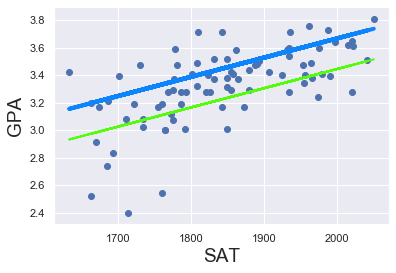

In [14]:
plt.scatter(data_done['SAT'],y)

no_regression = 0.6439 + 0.0014 * data_done['SAT']
yes_regression = (0.6439 + 0.2226) + 0.0014 * data_done['SAT']

fig = plt.plot(data_done['SAT'], no_regression, lw = 2, c = '#54FC0B')
fig = plt.plot(data_done['SAT'], yes_regression, lw = 4, c = '#0B84FC')

plt.xlabel('SAT', fontsize = 19)
plt.ylabel('GPA', fontsize = 19)

plt.show()

In [15]:
data_done['SAT']

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

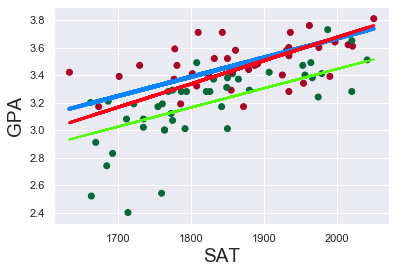

In [16]:
plt.scatter(data_done['SAT'],y, c = data_done['Attendance'], cmap = 'RdYlGn_r')

no_regression = 0.6439 + 0.0014 * data_done['SAT']
yes_regression = (0.6439 + 0.2226) + 0.0014 * data_done['SAT']

regression = 0.0017*data['SAT'] + 0.275

fig = plt.plot(data_done['SAT'], no_regression, lw = 2, c = '#54FC0B')
fig = plt.plot(data_done['SAT'], yes_regression, lw = 4, c = '#0B84FC')
fig = plt.plot(data_done['SAT'], regression, lw=3, c='#FF001B', label ='regression line')


plt.xlabel('SAT', fontsize = 19)
plt.ylabel('GPA', fontsize = 19)

plt.show()

In [17]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [18]:
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [19]:
results

In [20]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [21]:
df_for_predict = pd.DataFrame({'Predictions':round(predictions,2)})

In [22]:
df_for_predict

,Predictions
0,3.02
1,3.20


In [23]:
joined = new_data.join(df_for_predict)

In [24]:
joined.rename(index=({0:'Hello', 1:'Hi'}))

,const,SAT,Attendance,Predictions
Hello,1,1700,0,3.02
Hi,1,1670,1,3.20


## Simple linear regression

In [25]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [26]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [27]:
y = data['GPA']
x = data['SAT']

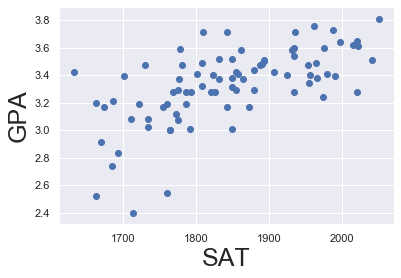

In [28]:
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 25)
plt.ylabel('GPA', fontsize = 25)
plt.show()

In [29]:
x1 = sm.add_constant(x)

In [30]:
results = sm.OLS(y,x).fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                   9.38e-102
Time:                        09:18:07   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

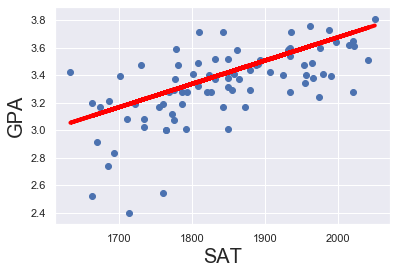

In [32]:
plt.scatter(x,y)

yhat = 0.0017*x + 0.275
fig = plt.plot(x,yhat,lw = 4,c = 'red', label = 'Linear regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [35]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [36]:
x = data['size']
y = data['price']

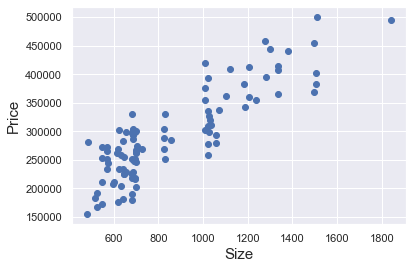

In [37]:
plt.scatter(x,y)
plt.xlabel('Size', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [38]:
x_matrix = x.values.reshape(-1,1)

In [39]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.score(x,y)

0.7447391865847587

In [41]:
reg.intercept_

101912.60180122915

In [42]:
reg.coef_

array([223.17874259])

In [43]:
reg.predict(155)

ValueError: Expected 2D array, got scalar array instead:
array=155.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.